# Automatic Zebra and Impala Detection and Geographical Tracking WICT 20th November 2022 Presentation 
# By Yuri Njathi

!['All logos'](figures/joint_logos.PNG)


# Manual Annotation

We collect 200 to 400 images per week.

Human annotation is laborious, automatic detection of animals in images or videos reduces the time taken.

Also, if we are at larger scales say collection of thousands, tens of thousands or hundred of thousands of images manual annotation will become unreasonable.

# Automatic Impala and Zebra Detection in Images and Videos

!['Animal detection'](figures/conservancy-animals-detected.PNG)


70 % of the images with animals have either an impala or a zebra 

We could also do automatic false trigger or non-animal trigger detection since 60% to 80% of the raw unpublished data  was either a false trigger or triggered by a human , birds or even insects. 

The purpose here is to locate the animals in images and videos, detect which animal it is then verify.  

In [1]:
#!pip install pandas
#!pip install numpy
#file and folder libraries
import pandas as pd
import numpy as np


import os
from datetime import datetime
# #Mapping libraries
# #import geopandas as gpd
# #from shapely.geometry import Point, Polygon

# # Import specific function 'from_epsg' from fiona module
# #from fiona.crs import from_epsg

#pytorch related
import torch
import matplotlib.pyplot as plt
import cv2


def detect_and_verify(source):
    img = (source)#('dataset/images/a.jpg')
    results = model(img)
    print(results)

    %matplotlib inline 
    plt.imshow(np.squeeze(results.render()))
    plt.show()
    
def detect_class(source):
    '''
    returns filename, impala_count, zebra_count, other_count
    '''
    img = (source)
    results = model(img)
    print(results)
    %matplotlib inline 
    plt.imshow(np.squeeze(results.render()))
    plt.show()

    r = str(results).split()
    impala_count = 0
    zebra_count = 0
    other_count = 0
    if 'impala' in r or 'impala,' in r:
        impala_count = 1
    if 'impalas' in r:
        index = r.index('impalas')
        impala_count = r[index-1]
    if 'impalas,' in r:
        index = r.index('impalas,')
        impala_count = r[index-1]
    if 'zebra' in r or 'zebra,' in r :
        zebra_count = 1
    if 'zebras' in r:
        index = r.index('zebras')
        zebra_count = r[index-1]
    if 'zebras,' in r:
        index = r.index('zebras,')
        zebra_count = r[index-1]
    if 'other' in r or 'other,' in r :
        other_count = 1
    if 'others' in r:
        index = r.index('others')
        other_count = r[index-1]
    if 'others,' in r:
        index = r.index('others,')
        other_count = r[index-1]

    return source, impala_count, zebra_count, other_count

C:\Users\Yuri\Desktop\DSAIL\wict-olpajeta\olpejeta\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#this is a open source pretrained model
!git clone https://github.com/ultralytics/yolov5

#load animal detection model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'models/lasst.pt',verbose=False)
print('Detection model has loaded')

#Set the confidence which you require from the model
model.conf = 0.45

fatal: destination path 'yolov5' already exists and is not an empty directory.
YOLOv5  2022-11-19 Python-3.10.8 torch-1.13.0+cpu CPU

Fusing layers... 


In [ ]:
detect_and_verify('dataset/images/impala.jpg')

In [ ]:
detect_and_verify(r'dataset\images\tortoise.jpg')

In [ ]:
detect_and_verify('dataset/images/waterbuck.jpg')

In [ ]:
detect_and_verify('dataset/images/impalas-warthogs.jpg')

## Automatic detection on multiple images

- It took 2 weeks to manually annotate 8554 images

- This was a rate of 25 images per hour

In [ ]:
#on multiple images
start = datetime.now()
#400 images with impalas or zebras
df_auto = pd.DataFrame()
Species = []
source = './dataset/data/processing/'
Filenames = os.listdir(source)
files = []
impalas = []
zebras = []
others = []

for image in Filenames[:]:
    try:
        _,b,c,d = detect_class(source+image)
        files.append(image)
        impalas.append(b)
        zebras.append(c)
        others.append(d)
        print(image,'  ',b,' Impalas ',c,' Zebras ',d,' Others\n')
    except:
        pass
df_auto['Filename'] = files
df_auto['Impala_count'] = impalas
df_auto['Zebra_count'] = zebras
df_auto['Other_count'] = others
end = datetime.now()
print('Timetaken : ',end-start,' HH:MM:SS')
print('Files processed',df_auto.shape[0])
df_auto.head(25)


In [ ]:
df_sightings = pd.DataFrame()
df = pd.read_excel('dataset/camera_trap_dataset_annotation.xlsx')
file_longitude = {}
file_latitude = {}
for i, row in df.iterrows():
    #print(row['Filename'],row['Latitude'],row['Longitude'])
    file_latitude[row['Filename']] = row['Latitude']
    file_longitude[row['Filename']] = row['Longitude']

In [ ]:
#add location
longs = []
lats = []
for i, row in df_auto.iterrows():
    lats.append(file_latitude[row['Filename']])
    longs.append(file_longitude[row['Filename']])
df_auto['Latitude'] = lats 
df_auto['Longitude'] = longs

In [ ]:
#Lets look at our data before we save it
df_auto.head()

In [ ]:
df_auto.to_csv('csvs/dekut_animal_counts.csv',index=False)

In [ ]:
cap = cv2.VideoCapture(r"dataset\Zebras and Gazelles in Masai Mara National Park, Kenya - Video 1.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    imshow_ = cv2.imshow('Detection of Zebras and Impalas', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Geographical Tracking

- Disclaimer: Privacy

- Monitoring the presence of scat and it's freshness is important to understanding the general location of the animals and the location we place camera traps. For most locations we placed the camera traps in open spaces. 


# Drones 

Is an option for carrying out a census due to elevation

##### Benefits

1. Wide coverage area
2. Mobilility
etc

##### Limitations

1. Requires a human operator (by law)
2. Noisy
3. Shorter battery life
4. More expensive
etc

In [ ]:
df = pd.read_csv('csvs/sightings.csv')

In [ ]:
df.head()

In [ ]:
df.drop(['Location'],inplace=True,axis=1)

## Show Animal distribution across the conservancy

There were 31 deployments across 18 different locations of the conservancy

Research into this can allow for the design of an array of cameras at strategic locations to optimize for monitoring specific variables of interest, for example, animal count, animal behaviour, protection from poachers or carnivores etc

Create a square heatmap grid that represents the count of animals in a particular location for the entire conservancy 

!['DeKUT conservancy'](./dataset/images/figures/conservancy.PNG)

In [31]:
newdata = gpd.GeoDataFrame()
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


In [32]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None
# Let's again see what's inside
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [33]:
#Coordinates of the DeKUT Conservancy
#Create a Shapely polygon from the coordinate-tuple list
# Coordinates of the DeKUT Conservancy
a = (36.955565, -0.385988)
b = (36.958534, -0.386569)
c = (36.960551, -0.386576)
d = (36.961850, -0.386365)
e = (36.963217, -0.386202)
f = (36.965222, -0.386558)
g = (36.966931, -0.386739)
h = (36.967129, -0.388918)
i = (36.966454, -0.389073)
j = (36.965501, -0.390102)
k = (36.962775, -0.392138)
l = (36.961348, -0.391217)
m = (36.95975, -0.38957)
n = (36.956927, -0.389760)
o = (36.956281, -0.388087)
coordinates = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
#print(poly)

# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
print(newdata)

# Add a new column and insert data
newdata.loc[0, 'location'] = 'DeKUT Conservancy'

# Let's check the data
print(newdata.crs)

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

                                            geometry
0  POLYGON ((36.95556 -0.38599, 36.95853 -0.38657...
None
+init=epsg:4326 +no_defs +type=crs


C:\Users\Yuri\anaconda3\envs\olpejeta20thNov2022\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [34]:
# Determine the output path for the Shapefile
outfp = "DeKUT_Conservancy.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

#path_to_data = geopandas.read_file(outfp)
gdf = gpd.read_file(outfp)

gdf

,location,geometry
0,DeKUT Conservancy,"POLYGON ((36.95556 -0.38599, 36.95853 -0.38657..."


In [35]:
gdf['area'] = gdf.area

gdf['area']

0    0.000042
Name: area, dtype: float64

In [36]:
# gdf.explore("area", legend=False,tiles="OpenStreetMap")

In [37]:
# gdf.centroid #POINT (36.96173 -0.38848)

In [38]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

gdf = gdf.set_geometry("centroid")

In [39]:
dekut_conserv = gpd.read_file('DeKUT_Conservancy.shp')

In [40]:
# dekut_conserv.to_crs(epsg=4326).plot()

In [41]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

C:\Users\Yuri\anaconda3\envs\olpejeta20thNov2022\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [42]:
geo_df.head()

,Impala_count,Zebra_count,Other_count,Longitude,Latitude,geometry
0,11,0,50,36.962348,-0.390386,POINT (36.96235 -0.39039)
1,29,3,57,36.962331,-0.390386,POINT (36.96233 -0.39039)
2,2,0,137,36.961408,-0.388557,POINT (36.96141 -0.38856)
3,34,0,386,36.965402,-0.386616,POINT (36.96540 -0.38662)
4,93,0,4,36.964172,-0.386405,POINT (36.96417 -0.38640)


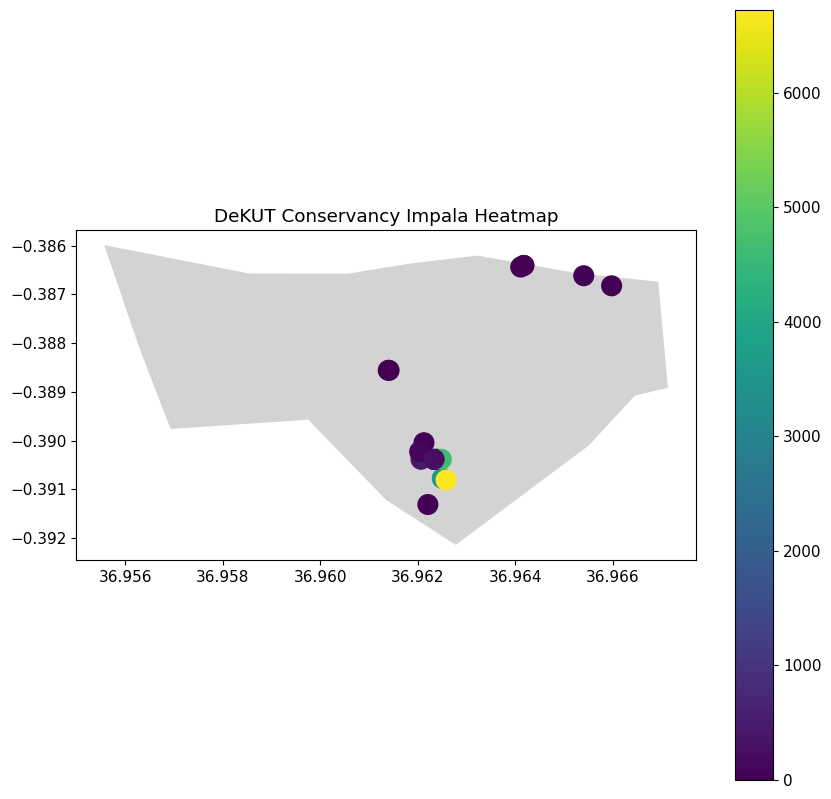

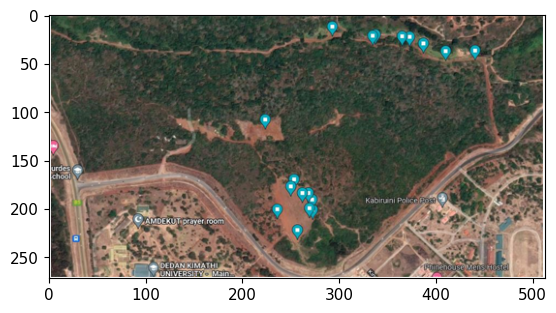

In [47]:
%matplotlib inline 
fig, ax = plt.subplots(figsize = (10,10))
dekut_conserv.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'Impala_count', ax=ax,
            legend = True, 
            markersize = 200)
ax.set_title('DeKUT Conservancy Impala Heatmap')
plt.savefig('Impala Heat Map')
plt.show()
%matplotlib inline 
img = plt.imread('conservancy.PNG')
plt.imshow(img)
plt.show()


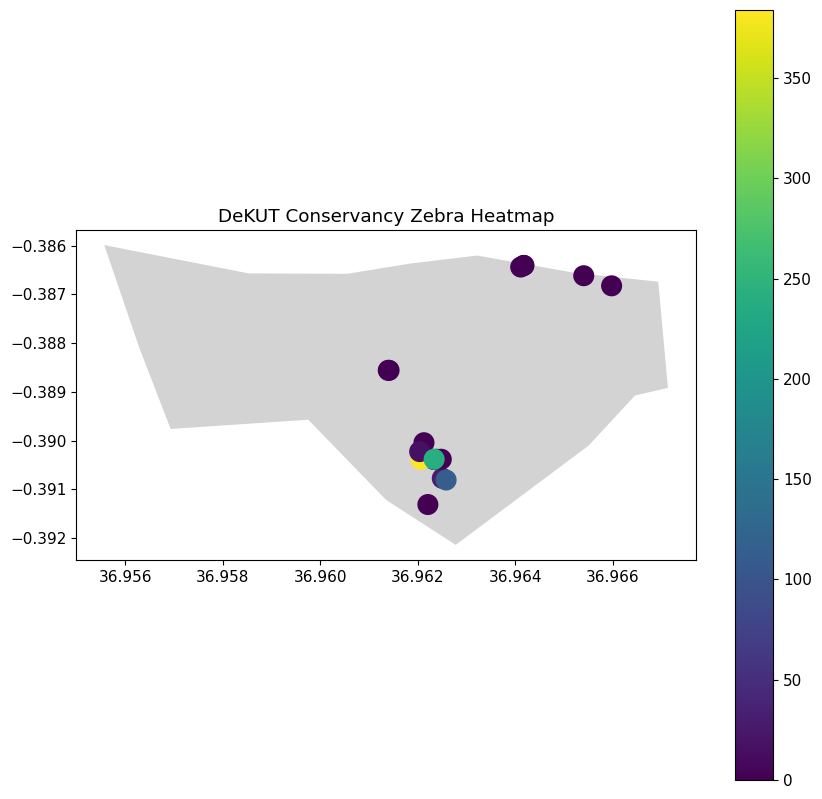

In [44]:
fig, ax = plt.subplots(figsize = (10,10))
dekut_conserv.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'Zebra_count', ax=ax,
            legend = True, 
            markersize = 200)
ax.set_title('DeKUT Conservancy Zebra Heatmap')
plt.savefig('Zebra Heat Map')

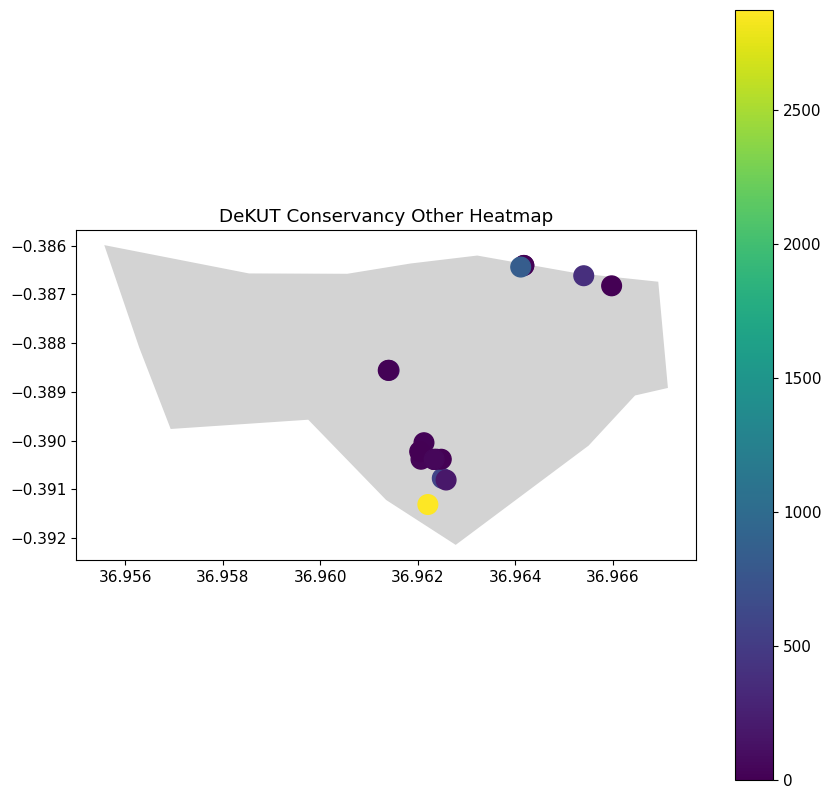

In [45]:
fig, ax = plt.subplots(figsize = (10,10))
dekut_conserv.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'Other_count', ax=ax,
            legend = True, 
            markersize = 200)
ax.set_title('DeKUT Conservancy Other Heatmap')
plt.savefig('Other Animals Heat Map')